In [28]:
import numpy as np
import pandas as pd
import requests
from io import StringIO
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
import nltk
from nltk.corpus import stopwords
import re
from tqdm import tqdm_notebook
from nltk.corpus import stopwords
from tensorflow.keras import regularizers, initializers, optimizers, callbacks
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential

import pandas as pd
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [29]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
df.shape

(256442, 6)

In [30]:
df=df.loc[0:10000,:]

In [31]:
df.isna().sum()

id           0
tid1         0
tid2         0
title1_en    0
title2_en    0
label        0
dtype: int64

In [32]:
df.shape

(10001, 6)

In [33]:
df.head()

,id,tid1,tid2,title1_en,title2_en,label
0,195611,0,1,There are two new old-age insurance benefits f...,"Police disprove ""bird's nest congress each per...",unrelated
1,191474,2,3,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outstrips Hong Kong? Shenzhen S...,unrelated
2,25300,2,4,"""If you do not come to Shenzhen, sooner or lat...",The GDP overtopped Hong Kong? Shenzhen clarifi...,unrelated
3,123757,2,8,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP overtakes Hong Kong? Bureau of ...,unrelated
4,141761,2,11,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outpaces Hong Kong? Defending R...,unrelated


In [34]:
sum(df['label']=='unrelated')

6592

In [35]:
sum(df['label']=='agreed')

3114

In [36]:
sum(df['label']=='disagreed')

295

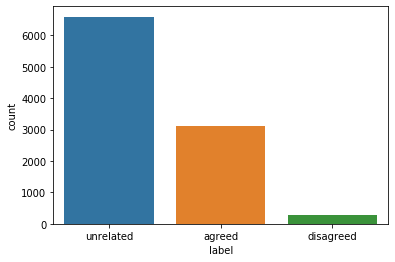

In [37]:
import seaborn as sns
sns.countplot(df.label)

In [38]:
df['text'] = df['title1_en'] + " " + df['title2_en']

In [39]:
#labels = df['label'].astype('category').cat.categories.tolist()
#replace_map_comp = {'label' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
#print(replace_map_comp)

In [40]:
#df.replace(replace_map_comp, inplace=True)

In [41]:
#df.head(10)

In [42]:
#df=df.drop(['title2_en','title1_en','tid1','tid2','id'],axis=1)

In [43]:
#df.head(10)

In [44]:
#labels = df['label'].astype('category').cat.categories.tolist()
#replace_map_comp = {'label' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
#print(replace_map_comp)

In [45]:
#df.replace(replace_map_comp, inplace=True)

In [46]:
#x=df.drop('label',axis=1)

In [47]:
x=df['text']

In [48]:
x.head()

0    There are two new old-age insurance benefits f...
1    "If you do not come to Shenzhen, sooner or lat...
2    "If you do not come to Shenzhen, sooner or lat...
3    "If you do not come to Shenzhen, sooner or lat...
4    "If you do not come to Shenzhen, sooner or lat...
Name: text, dtype: object

In [49]:
y=pd.get_dummies(df['label'])

In [50]:
y.head()

,agreed,disagreed,unrelated
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [51]:
y.head()

,agreed,disagreed,unrelated
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [52]:
voc_size=5000

In [53]:
messages=x.copy()

In [54]:
messages[0]

'There are two new old-age insurance benefits for old people in rural areas. Have you got them? Police disprove "bird\'s nest congress each person gets 50,000 yuan" still old people insist on going to beijing'

In [55]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in
             stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [57]:
corpus[1]

'come shenzhen sooner later son also come less year shenzhen per capita gdp exceed hong kong shenzhen gdp outstrip hong kong shenzhen statist bureau dismiss rumor gap narrow'

In [58]:
corpus

['two new old age insur benefit old peopl rural area got polic disprov bird nest congress person get yuan still old peopl insist go beij',
 'come shenzhen sooner later son also come less year shenzhen per capita gdp exceed hong kong shenzhen gdp outstrip hong kong shenzhen statist bureau dismiss rumor gap narrow',
 'come shenzhen sooner later son also come less year shenzhen per capita gdp exceed hong kong gdp overtop hong kong shenzhen clarifi littl bit',
 'come shenzhen sooner later son also come less year shenzhen per capita gdp exceed hong kong shenzhen gdp overtak hong kong bureau statist refut rumor unsurpass gap shrink',
 'come shenzhen sooner later son also come less year shenzhen per capita gdp exceed hong kong shenzhen gdp outpac hong kong defend rumor gap narrow yet',
 'discrimin oil gutter oil mean garlic practic use singl piec garlic distinguish oil oil',
 'discrimin oil gutter oil mean garlic differenti gutter oil identifi singl piec garlic',
 'discrimin oil gutter oil me

In [59]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[3269,
  1202,
  1945,
  2949,
  4493,
  879,
  1945,
  2864,
  469,
  207,
  338,
  4513,
  4001,
  2235,
  3981,
  1894,
  3295,
  511,
  331,
  2163,
  1945,
  2864,
  3893,
  563,
  709],
 [2558,
  2574,
  2346,
  1167,
  3465,
  819,
  2558,
  4018,
  1666,
  2574,
  51,
  4882,
  2052,
  1578,
  4184,
  2785,
  2574,
  2052,
  4673,
  4184,
  2785,
  2574,
  1003,
  4674,
  1246,
  3287,
  1013,
  1306],
 [2558,
  2574,
  2346,
  1167,
  3465,
  819,
  2558,
  4018,
  1666,
  2574,
  51,
  4882,
  2052,
  1578,
  4184,
  2785,
  2052,
  4016,
  4184,
  2785,
  2574,
  2243,
  4108,
  88],
 [2558,
  2574,
  2346,
  1167,
  3465,
  819,
  2558,
  4018,
  1666,
  2574,
  51,
  4882,
  2052,
  1578,
  4184,
  2785,
  2574,
  2052,
  3618,
  4184,
  2785,
  4674,
  1003,
  3834,
  3287,
  4856,
  1013,
  2719],
 [2558,
  2574,
  2346,
  1167,
  3465,
  819,
  2558,
  4018,
  1666,
  2574,
  51,
  4882,
  2052,
  1578,
  4184,
  2785,
  2574,
  2052,
  1386,
  4184,
  2785,
  2252,
  

In [60]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[ 879 1945 2864 ... 3893  563  709]
 [1666 2574   51 ... 3287 1013 1306]
 [3465  819 2558 ... 2243 4108   88]
 ...
 [   0  310 2864 ... 3446 2320 1542]
 [1123 4114 2046 ... 2668  990  990]
 [1720 4429 1945 ... 2668  449 1147]]


In [61]:
embedded_docs[0]


array([ 879, 1945, 2864,  469,  207,  338, 4513, 4001, 2235, 3981, 1894,
       3295,  511,  331, 2163, 1945, 2864, 3893,  563,  709])

In [62]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length= sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [63]:
len(embedded_docs),y.shape

(10001, (10001, 3))

In [64]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)
X_final.shape,y_final.shape

((10001, 20), (10001, 3))

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [66]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

ValueError: A target array with shape (6700, 3) was passed for an output of shape (None, 1) while using as loss `binary_crossentropy`. This loss expects targets to have the same shape as the output.

In [ ]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
y_pred=model.predict_classes(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)
